Import the necessary packages

In [1]:
import numpy
import matplotlib.pyplot as plt
from keras.utils import np_utils
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten
from tensorflow.keras.optimizers import Adam

Load data

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


data analysis

In [3]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [4]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [5]:
y_train[0]

5

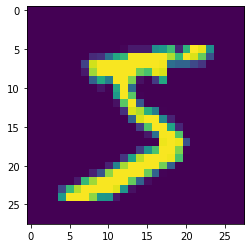

In [6]:
plt.imshow(X_train[0])

data preprocessing

In [7]:
X_train = X_train.reshape(60000, 28, 28, 1).astype('float32')
X_test = X_test.reshape(10000, 28, 28, 1).astype('float32')

In [8]:
number_of_classes = 10
Y_train = np_utils.to_categorical(y_train, number_of_classes)
Y_test = np_utils.to_categorical(y_test, number_of_classes)

In [9]:
Y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

Create model

In [10]:
model = Sequential()
model.add(Conv2D(64, (3, 3), input_shape=(28, 28, 1), activation="relu"))
model.add(Conv2D(32, (3, 3), activation="relu"))
model.add(Flatten())
model.add(Dense(number_of_classes, activation="softmax"))

In [11]:
model.compile(loss='categorical_crossentropy', optimizer="Adam", metrics=["accuracy"])

Train the model

In [12]:
model.fit(X_train, Y_train, batch_size=32, epochs=5, validation_data=(X_test,Y_test))

Epoch 1/5
1875/1875 [==============================] - 196s 104ms/step - loss: 0.2109 - accuracy: 0.9548 - val_loss: 0.0817 - val_accuracy: 0.9760
Epoch 2/5
1875/1875 [==============================] - 192s 103ms/step - loss: 0.0641 - accuracy: 0.9805 - val_loss: 0.0822 - val_accuracy: 0.9753
Epoch 3/5
1875/1875 [==============================] - 193s 103ms/step - loss: 0.0484 - accuracy: 0.9845 - val_loss: 0.0783 - val_accuracy: 0.9786
Epoch 4/5
1875/1875 [==============================] - 192s 103ms/step - loss: 0.0352 - accuracy: 0.9886 - val_loss: 0.1111 - val_accuracy: 0.9749
Epoch 5/5
1875/1875 [==============================] - 192s 102ms/step - loss: 0.0315 - accuracy: 0.9902 - val_loss: 0.1056 - val_accuracy: 0.9760


Test the model

In [13]:
metrics = model.evaluate(X_test, Y_test, verbose=0)
print("Metrics (Test Loss & Test Accuracy): ")
print(metrics)

Metrics (Test Loss & Test Accuracy): 
[0.10558395832777023, 0.9760000109672546]


In [14]:
prediction = model.predict(X_test[:4])
print(prediction)

1/1 [==============================] - 0s 101ms/step
[[5.8625339e-14 7.4108541e-21 3.4463207e-10 6.2829542e-09 4.8454189e-22
  2.0014624e-15 1.0329886e-21 1.0000000e+00 1.9857110e-13 5.8269080e-13]
 [9.6005781e-12 3.3386452e-10 1.0000000e+00 1.3692992e-14 1.4476005e-15
  3.2580487e-17 2.7072291e-08 1.8218630e-18 5.6260715e-11 1.9061521e-18]
 [3.4797512e-09 9.9999809e-01 2.8477552e-07 1.1429936e-13 6.5001053e-08
  4.3673364e-08 1.7072155e-09 1.4141953e-09 1.5383591e-06 2.6600149e-09]
 [1.0000000e+00 7.4700686e-19 5.1072449e-13 6.7873974e-19 5.1102100e-12
  3.3278957e-13 1.0156297e-11 5.4088656e-12 2.7811578e-11 9.9928243e-10]]


In [15]:
print(numpy.argmax(prediction, axis=1))
print(Y_test[:4])

[7 2 1 0]
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
